In [14]:
#import timeit

import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fft
from   PIL import Image
#from   scipy import ndimage, misc, signal
import scipy.fftpack as fp
#from   scipy.stats import signaltonoise # deprecated
#from   skimage import data, img_as_float
from   skimage.color import rgb2gray
from   skimage.io import imread, imshow, show
#from   skimage.transform import rescale

#%matplotlib inline

In [2]:
IMG =  '../../../images'

In [3]:
im = np.array(Image.open(f'{IMG}/rhino.jpg').convert('L'))
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real # reconstructed
assert(np.allclose(im, im1))

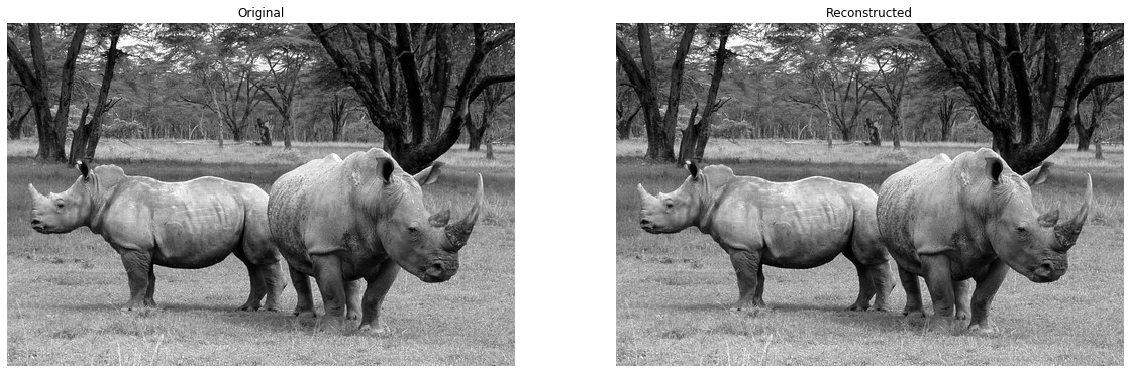

In [4]:
pylab.figure(figsize=(20, 10))
pylab.subplot(121)
pylab.imshow(im, cmap='gray')
pylab.axis('off')
pylab.title('Original')

pylab.subplot(122)
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.title('Reconstructed');

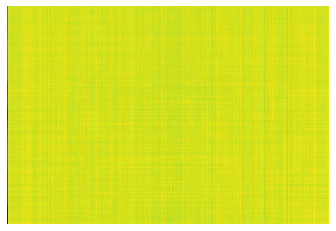

In [5]:
diff = im1 - im
pylab.imshow(diff)
pylab.axis('off');

### Frequency Spectrum Plotting

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


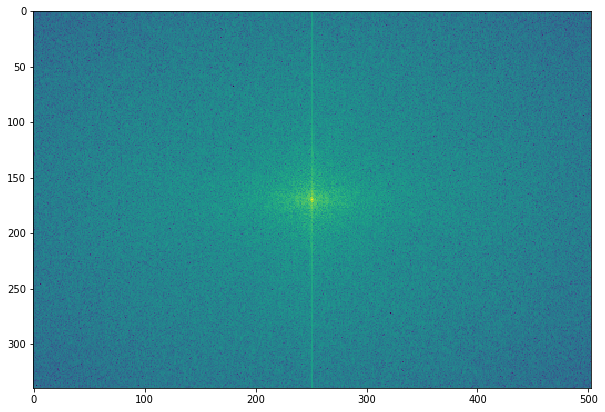

In [6]:
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log10(0.1 + freq2)).astype(int));

### DFT Magnitude and Phase

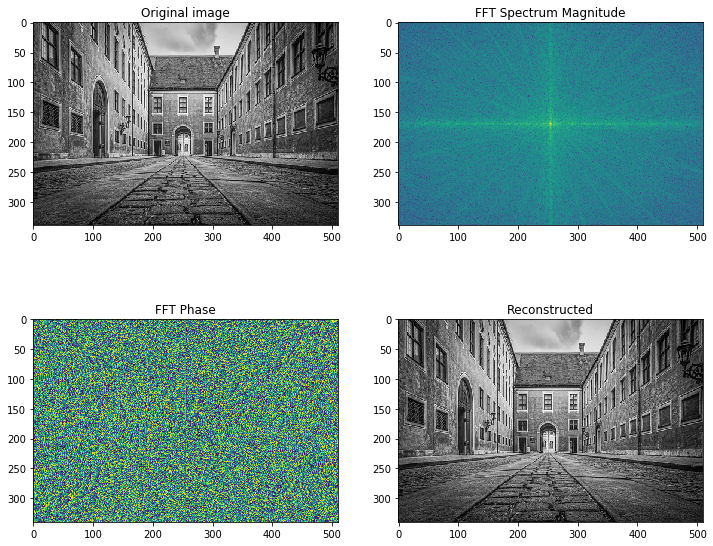

In [23]:
def deconstruct_fft(img_path):
    im1 = rgb2gray(imread(img_path))
    freq1 = fft.fft2(im1)
    im1_ = fft.ifft2(freq1).real

    pylab.figure(figsize=(12, 10))
    pylab.subplot(221)
    pylab.imshow(im1, cmap='gray')
    pylab.title('Original image')
    pylab.subplot(222)
    pylab.imshow(20*np.log10(0.01 + np.abs(fft.fftshift(freq1))))
    pylab.title('FFT Spectrum Magnitude')
    pylab.subplot(223)
    pylab.imshow(np.angle(fft.fftshift(freq1)))
    pylab.title('FFT Phase')
    pylab.subplot(224)
    pylab.imshow(np.clip(im1_, 0, 255), cmap='gray')
    pylab.title('Reconstructed');
    return freq1
    
freq1 = deconstruct_fft(f'{IMG}/house.png')    

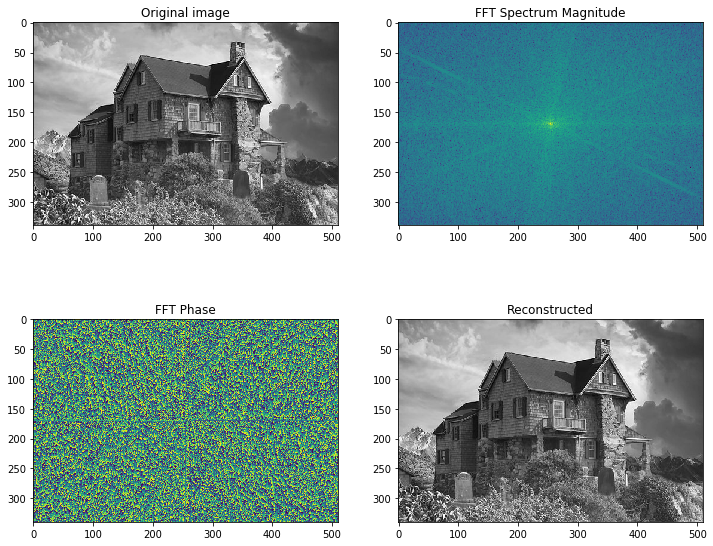

In [24]:
freq2 = deconstruct_fft(f'{IMG}/house2.png')

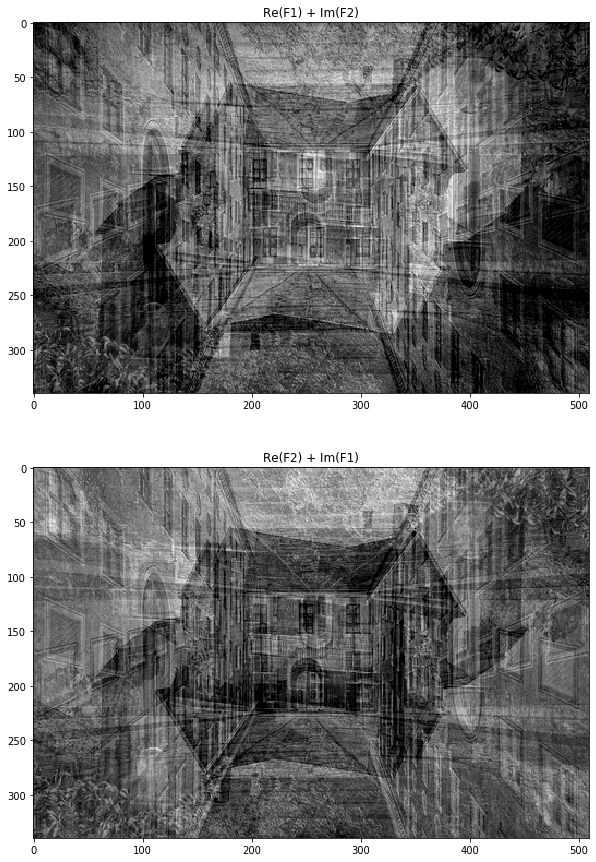

In [26]:
pylab.figure(figsize=(20, 15))
im1_ = fft.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fft.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real

pylab.subplot(211)
pylab.imshow(np.clip(im1_, 0, 255), cmap='gray')
pylab.title('Re(F1) + Im(F2)')

pylab.subplot(212)
pylab.imshow(np.clip(im2_, 0, 255), cmap='gray')
pylab.title('Re(F2) + Im(F1)');